In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Heart.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
df.shape

(720, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       720 non-null    int64 
 1   sex       720 non-null    int64 
 2   cp        720 non-null    int64 
 3   trestbps  720 non-null    object
 4   chol      720 non-null    object
 5   fbs       720 non-null    object
 6   restecg   720 non-null    object
 7   thalach   720 non-null    object
 8   exang     720 non-null    object
 9   oldpeak   720 non-null    object
 10  slope     720 non-null    object
 11  ca        720 non-null    object
 12  thal      720 non-null    object
 13  num       720 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 78.9+ KB


# Data Cleaning

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [7]:
df[df == '?'].count()

age           0
sex           0
cp            0
trestbps      3
chol         23
fbs          83
restecg       2
thalach       2
exang         2
oldpeak       6
slope       207
ca          413
thal        320
num           0
dtype: int64

In [8]:
df_q = df.replace("?", np.nan)
df_q.isna().sum()

age           0
sex           0
cp            0
trestbps      3
chol         23
fbs          83
restecg       2
thalach       2
exang         2
oldpeak       6
slope       207
ca          413
thal        320
num           0
dtype: int64

In [9]:
cols = ['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

In [10]:
df_q[cols] = df_q[cols].astype(float)

In [11]:
df = df_q.fillna(df_q.mean())
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [12]:
df[df < 0].count()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak     11
slope        0
ca           0
thal         0
num          0
dtype: int64

In [13]:
df_n = (df['oldpeak'] < 0)
df = df[~df_n]

In [14]:
df[df < 0].count()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [15]:
df.shape

(709, 14)

# Error Correcting

In [16]:
def remove_outlier(data, threshold=3):
    z_scores = np.abs((data - data.mean())/data.std())
    out = (z_scores > 3)
    data = data[~out.any(axis=1)]
    return data
remove_outlier(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
2,67,1,4,120.000000,229.0,0.00000,2.0,129.00000,1.000000,2.600000,2.000000,2.000000,7.000,1
3,37,1,3,130.000000,250.0,0.00000,0.0,187.00000,0.000000,3.500000,3.000000,0.000000,3.000,0
4,41,0,2,130.000000,204.0,0.00000,2.0,172.00000,0.000000,1.400000,1.000000,0.000000,3.000,0
5,56,1,2,120.000000,236.0,0.00000,0.0,178.00000,0.000000,0.800000,1.000000,0.000000,3.000,0
6,62,0,4,140.000000,268.0,0.00000,2.0,160.00000,0.000000,3.600000,3.000000,2.000000,3.000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,69,1,4,131.804742,0.0,0.00000,1.0,140.56546,0.337047,0.789636,1.701754,0.680782,7.000,3
715,70,1,4,115.000000,0.0,0.00000,1.0,92.00000,1.000000,0.000000,2.000000,0.680782,7.000,1
717,72,1,3,160.000000,0.0,0.10989,2.0,114.00000,0.000000,1.600000,2.000000,2.000000,4.985,0
718,73,0,3,160.000000,0.0,0.00000,1.0,121.00000,0.000000,0.000000,1.000000,0.680782,3.000,1


# Data Transformation

In [17]:
df["num"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [18]:
df.loc[df["num"] == 0, 'num'] = "c1"
df.loc[df['num'] == 1, 'num'] = 'c2'
df.loc[df['num'] == 2, 'num'] = 'c3'
df.loc[df['num'] == 3, 'num'] = 'c4'
df.loc[df['num'] == 4, 'num'] = 'c5'

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,c1
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,c3
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,c2
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,c1
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,c1


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
le.fit(df['num'])

LabelEncoder()

In [22]:
df['num'] = le.transform(df['num'])

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Model Building

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = df.iloc[:, 0:13]
y = df['num']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [27]:
print(x.shape)
x_train.shape

(709, 13)


(567, 13)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Logistic Regression

In [29]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

C:\Users\dsb71\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred_lr = logReg.predict(x_test)

Accuracy Score (Logistic regression) :  0.5985915492957746


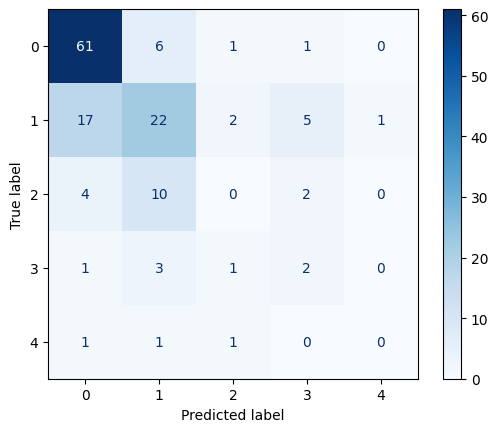

In [31]:
print("Accuracy Score (Logistic regression) : ", accuracy_score(y_test, y_pred_lr))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot(cmap='Blues', xticks_rotation='horizontal')

In [32]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [33]:
y_pred_nb = naive_bayes.predict(x_test)

Accuracy Score (Naive Bayes) :  0.6338028169014085


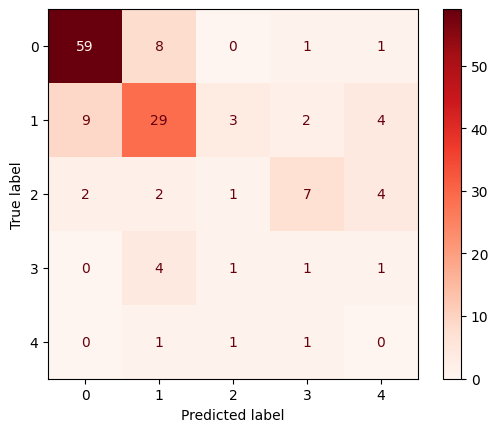

In [34]:
print("Accuracy Score (Naive Bayes) : ", accuracy_score(y_test, y_pred_nb))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb)).plot(cmap="Reds", xticks_rotation='horizontal')

In [35]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred_knn = knn.predict(x_test)

Accuracy Score (KNN) :  0.6126760563380281


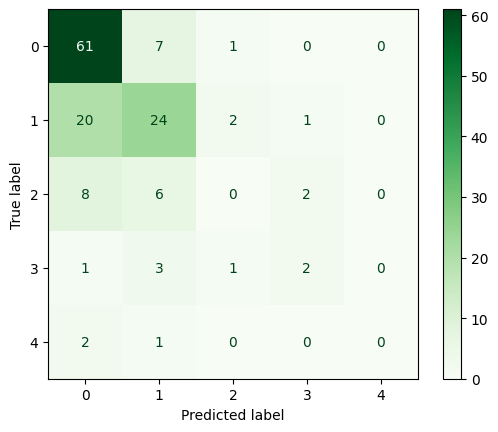

In [37]:
print("Accuracy Score (KNN) : ", accuracy_score(y_test, y_pred_knn))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot(cmap="Greens", xticks_rotation='horizontal')